In [4]:
%matplotlib inline

In [29]:
"""


"""
import json
import boto3
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

import numpy as np
# import seaborn as sns

np.set_printoptions(precision=3)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.5/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python3.5/dist-packages/z

In [32]:
def plot(json_results, url, name_clean):

    results_ = {k: v for k, v in json_results.items()}
    print(results_)

    def get_spectrum(spec, name, colors):
        spec = dict(zip(spec, range(len(spec))))
        y, x = list(
            zip(*sorted(filter(lambda kv: kv[0] in spec, results_.items()), key=lambda kv: spec[kv[0]])))
        ''' remove denoiseing until new baseline is calculated '''
        make_fig(x, y, name, colors)

    # sns.set(style='whitegrid', font='Tahoma', font_scale=1.7)

    def label_cleaner(y):
        key = {
            'fakenews': 'fake news',
            'pro-science': 'scientific',
            'extremeright': 'extreme right',
            'extremeleft': 'extreme left',
            'right-center': 'right of center',
            'left-center': 'left of center',
            'very high': 'very high accuracy',
            'high': 'high accuracy',
            'mixed': 'muddled accuracy',
            'low': 'pants on fire!',
        }
        for label in y:
            for k, v in key.items():
                if label == k:
                    label = v.title()

            yield label.title()

    default_cp = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
    pol_colors = ["#9c3229", "#C8493A", "#D6837F", "#DCDDDD", "#98B5C6", "#6398C9", "#3F76BB"]
    acc_colors = ["#444784", "#2F7589", "#29A181", "#7CCB58"]
    char_colors = ["#444784", "#7CCB58", "#3976C5", "#02B97C", "#C8493A"]

    print()

    max_val = max([v for k, v in results_.items() if k != 'n_words'])
    print(max_val)
    print()

    def make_fig(x, y, cat, colors='coolwarm_r'):
        color_p = default_cp
        if cat == "Political":
            color_p = pol_colors
        elif cat == "Accuracy":
            color_p = acc_colors
        elif cat == "Character":
            color_p = char_colors

        y = list(label_cleaner(y))

        plt.figure(figsize=(8, 8))
        y_pos = np.arange(len(y))
        x = np.asarray(x)
        # g = sns.barplot(y=y_pos, x=x, palette=(sns.color_palette(color_p)), orient='h', saturation=.9)
        """
        
        """
        font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

        matplotlib.rc('font', **font)
        g = plt.barh(y_pos, x, color = color_p)
        
        plt.yticks(y_pos, y)
        plt.title('{} - {}'.format(url, cat))
        plt.xlabel('Neural network estimation',fontsize='medium')

        plt.xlim(0, max_val)
        
        fname = '{}.png'.format(name_clean + '_' + cat)
        
        
        """"""
        plt.show();
        return
        """"""
        
        
        from io import BytesIO
        img_buffer = BytesIO()        
        plt.savefig(img_buffer, format='png', bbox_inches='tight', dpi=100)
        plt.clf()

        img_buffer.seek(0)  # rewind to beginning of file
        to_s3(img_buffer, fname)

    def to_s3(png, fname):

        s3 = boto3.resource('s3')
        bucket = s3.Bucket('fakenewsimg')
        bucket.upload_fileobj(png, fname)
        
        
    
        
        
    get_spectrum(
        ['extreme right', 'right', 'right-center', 'center', 'left-center', 'left', 'extreme left'],
        'Political', 'policic_colors')

    get_spectrum(['very high', 'high', 'mixed', 'low', 'unreliable'], 'Accuracy', 'veracity_colors')
    plt.close('all')

    get_spectrum(['conspiracy', 'fake news', 'propaganda', 'pro-science', 'satire', 'hate'], 'Character',
                 'charachter_colors')

    print('Plotting finished')

{'satire': 0.023235, 'conspiracy': 0.036079, 'low': 0.006344, 'propaganda': 0.011925, 'right': 0.151564, 'right-center': 0.062835, 'high': 0.29368, 'mixed': 0.293917, 'extreme right': 0.013205, 'center': 0.017353, 'left-center': 0.101551, 'extreme left': 0.001491, 'left': 0.069697, 'fake news': 0.026105, 'pro-science': 0.001237, 'very high': 0.002354, 'hate': 0.002538}

0.293917



/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


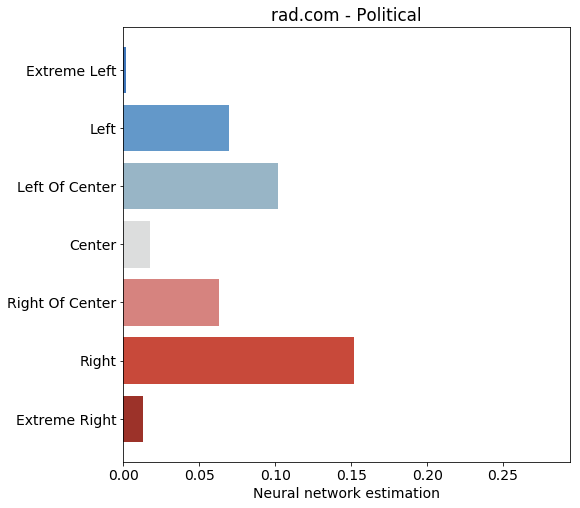

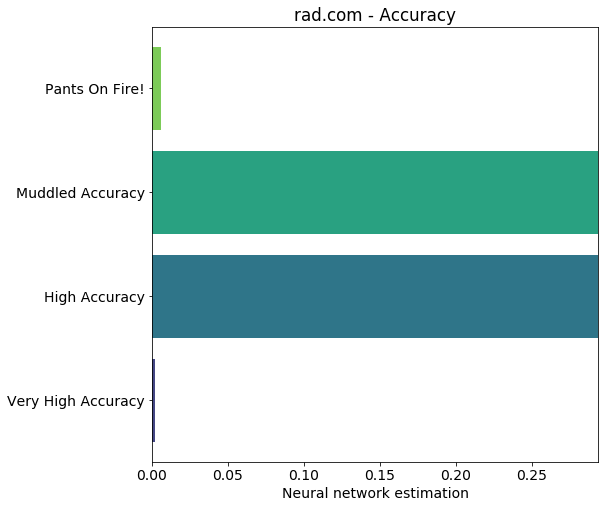

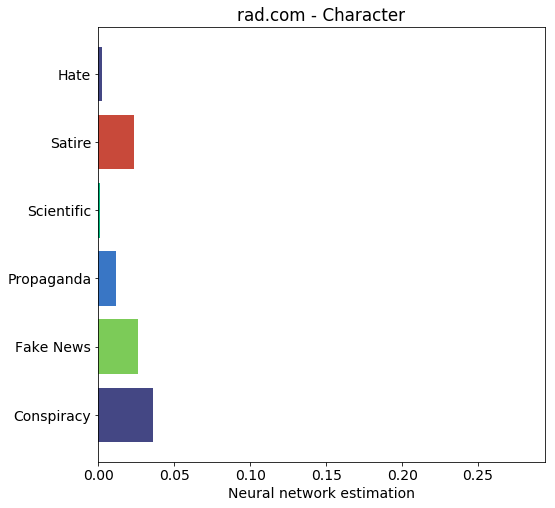

Plotting finished


In [33]:
if __name__ == '__main__':

    # plot(' _test_', 'breitbartcom')
    plot({
        'fake news': 0.026105,
        'center': 0.017353,
        'left': 0.069697,
        'extreme left': 0.001491,
        'mixed': 0.293917,
        'low': 0.006344,
        'right-center': 0.062835,
        'propaganda': 0.011925,
        'conspiracy': 0.036079,
        'hate': 0.002538,
        'high': 0.29368,
        'satire': 0.023235,
        'extreme right': 0.013205,
        'very high': 0.002354,
        'pro-science': 0.001237,
        'left-center': 0.101551,
        'right': 0.151564
    }, 'rad.com', 'rad.com')